In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Count'>

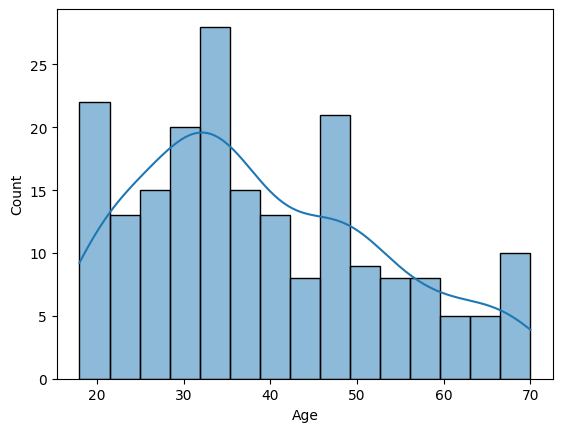

In [6]:
sns.histplot(x=df.Age, bins=15, kde='True')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

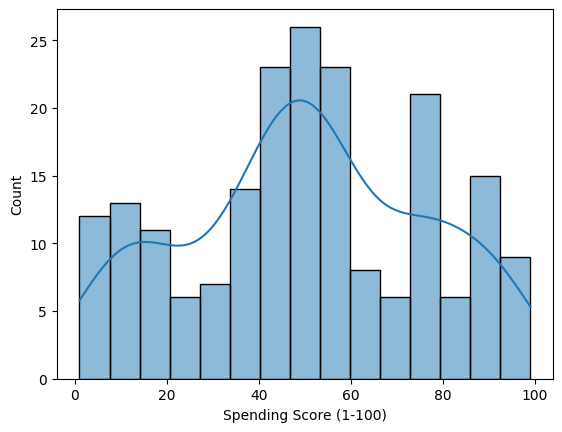

In [7]:
sns.histplot(x=df['Spending Score (1-100)'], bins=15, kde='True')

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

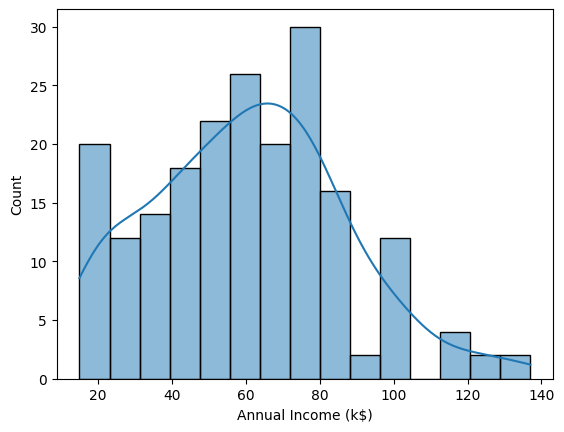

In [8]:
sns.histplot(x=df['Annual Income (k$)'], bins=15, kde='True')

<Axes: xlabel='Gender', ylabel='count'>

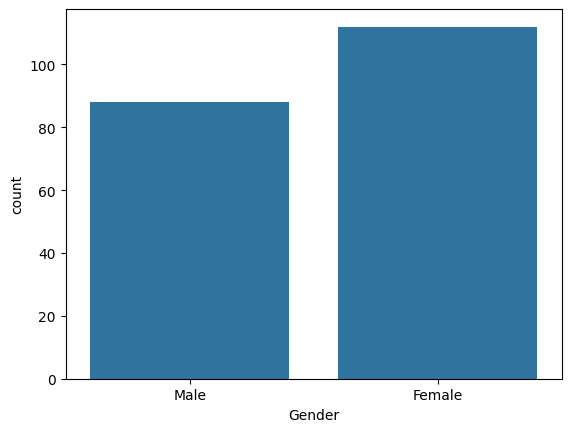

In [9]:
sns.countplot(x=df['Gender'])

<Axes: ylabel='Annual Income (k$)'>

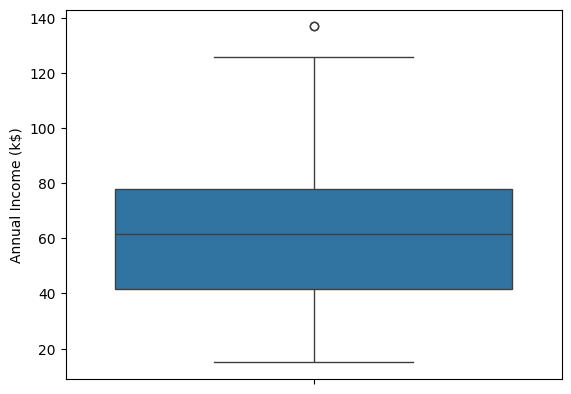

In [11]:
sns.boxplot(y=df['Annual Income (k$)'])

<Axes: ylabel='Age'>

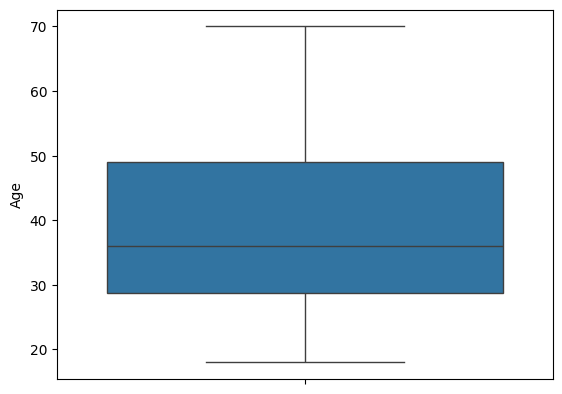

In [13]:
sns.boxplot(y=df['Age'])

<Axes: ylabel='Spending Score (1-100)'>

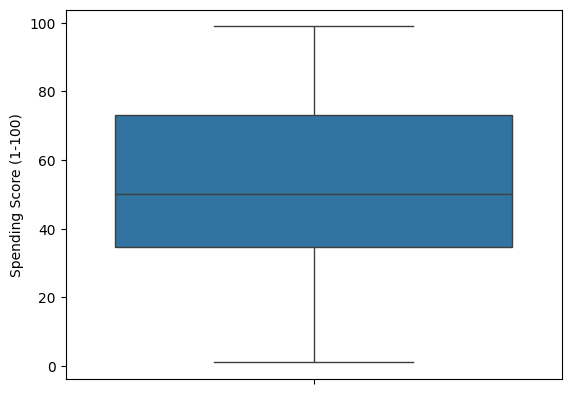

In [14]:
sns.boxplot(y=df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

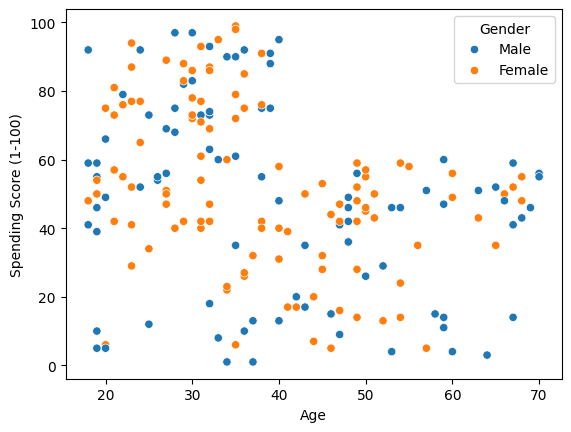

In [18]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],hue=df['Gender'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

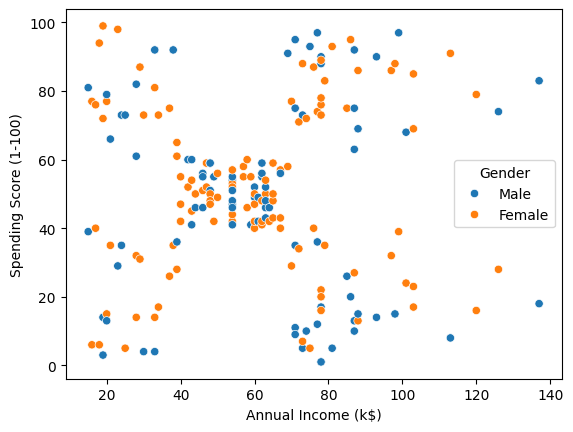

In [17]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Gender'])

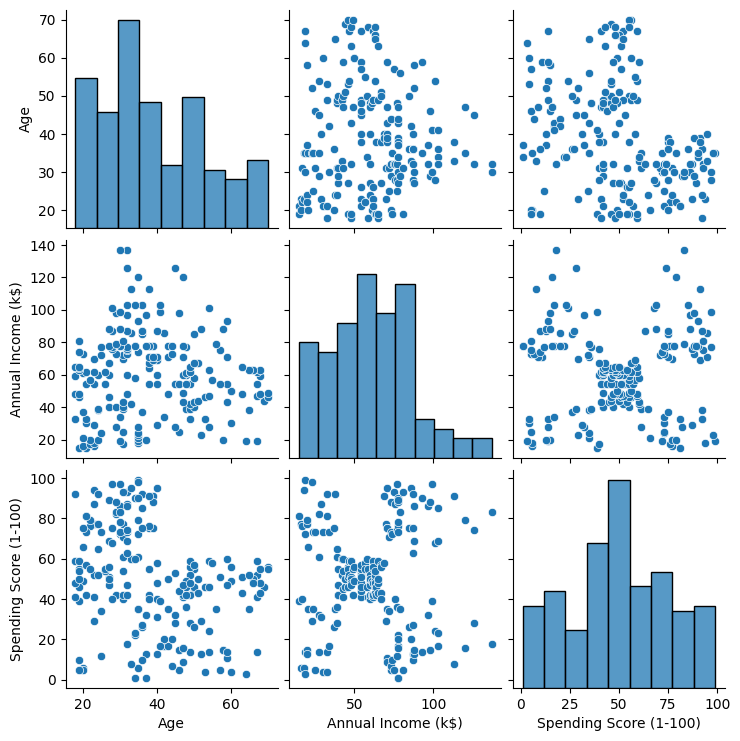

In [19]:
sns.pairplot(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [28]:
Q1_income = df['Annual Income (k$)'].quantile(0.25)
Q3_income = df['Annual Income (k$)'].quantile(0.75)

In [29]:
IQR_income = Q3_income - Q1_income

In [30]:
upper_bound_income = Q3_income + 1.5*IQR_income
lower_bound_income = Q1_income - 1.5*IQR_income

In [31]:
df[df['Annual Income (k$)']>upper_bound_income]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [32]:
df[df['Annual Income (k$)']<lower_bound_income]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [36]:
outlier_income = df[(df['Annual Income (k$)']<lower_bound_income) | (df['Annual Income (k$)']>upper_bound_income)]

In [37]:
outlier_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [39]:
df_cleaned = df.drop(outlier_income.index, axis=0, inplace=True)

In [41]:
df.shape

(198, 5)

In [42]:
df[df['Annual Income (k$)']>upper_bound_income]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [20]:
from sklearn.preprocessing import StandardScaler

In [45]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [46]:
scaler = StandardScaler()

In [47]:
scaler_features = scaler.fit_transform(X)

In [48]:
df_scaler = pd.DataFrame(scaler_features, columns=['Annual Income Scaler', 'Spending Score Scaler'])

In [49]:
df_scaler.head()

,Annual Income Scaler,Spending Score Scaler
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


In [50]:
df_scaler.describe()

,Annual Income Scaler,Spending Score Scaler
count,198.000000,1.980000e+02
mean,0.000000,1.104616e-16
std,1.002535,1.002535e+00
min,-1.779171,-1.915640e+00
25%,-0.766199,-5.917421e-01
50%,0.048151,-7.669638e-03
75%,0.713534,8.781735e-01
max,2.630236,1.900300e+00


In [51]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

In [69]:
kmeans.fit(df_scaler)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [70]:
clusters_labels = kmeans.labels_

In [71]:
df['Clusters'] = clusters_labels

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [73]:
df['Clusters'].value_counts().sort_index()

Clusters
0    22
1    35
2    38
3    80
4    23
Name: count, dtype: int64

In [74]:
kmeans.cluster_centers_

array([[-1.35303699,  1.13569638],
       [ 1.05488046, -1.27037859],
       [ 1.0098993 ,  1.24245028],
       [-0.18671971, -0.01886436],
       [-1.33011303, -1.14026225]])

In [62]:
interia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaler)
    interia.append(kmeans.inertia_)

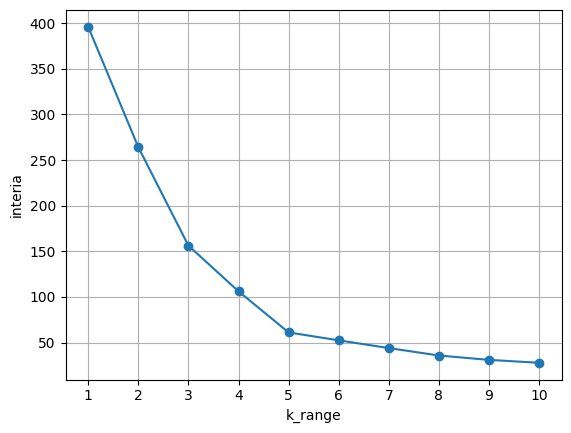

In [67]:
plt.plot(k_range, interia, marker='o', linestyle='-')
plt.xlabel('k_range')
plt.ylabel('interia')
plt.xticks(k_range)
plt.grid(True)

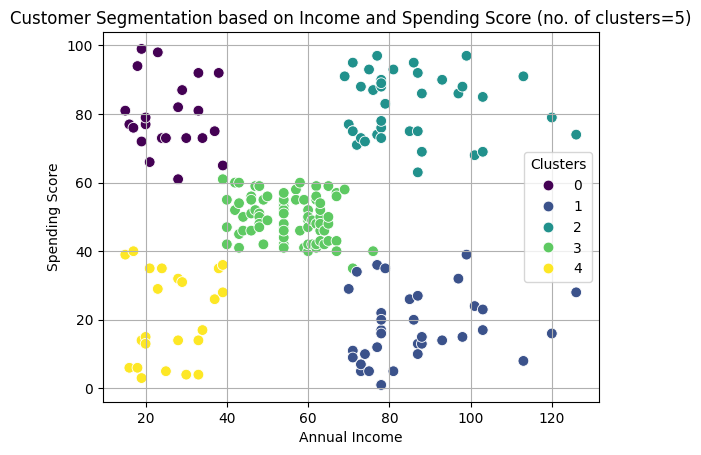

In [78]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Clusters'], palette='viridis', s=60)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation based on Income and Spending Score (no. of clusters=5)')
plt.grid(True)

In [81]:
cluster_mean = df.groupby('Clusters')[['Age','Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_mean.head()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,25.272727,25.727273,79.363636
1,40.914286,86.342857,17.571429
2,32.763158,85.210526,82.105263
3,42.937500,55.087500,49.712500
4,45.217391,26.304348,20.913043


In [82]:
from sklearn.metrics import silhouette_score

In [83]:
silhouette_avg = silhouette_score(df_scaler, df['Clusters'])
silhouette_avg

0.5599199830769206

In [84]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

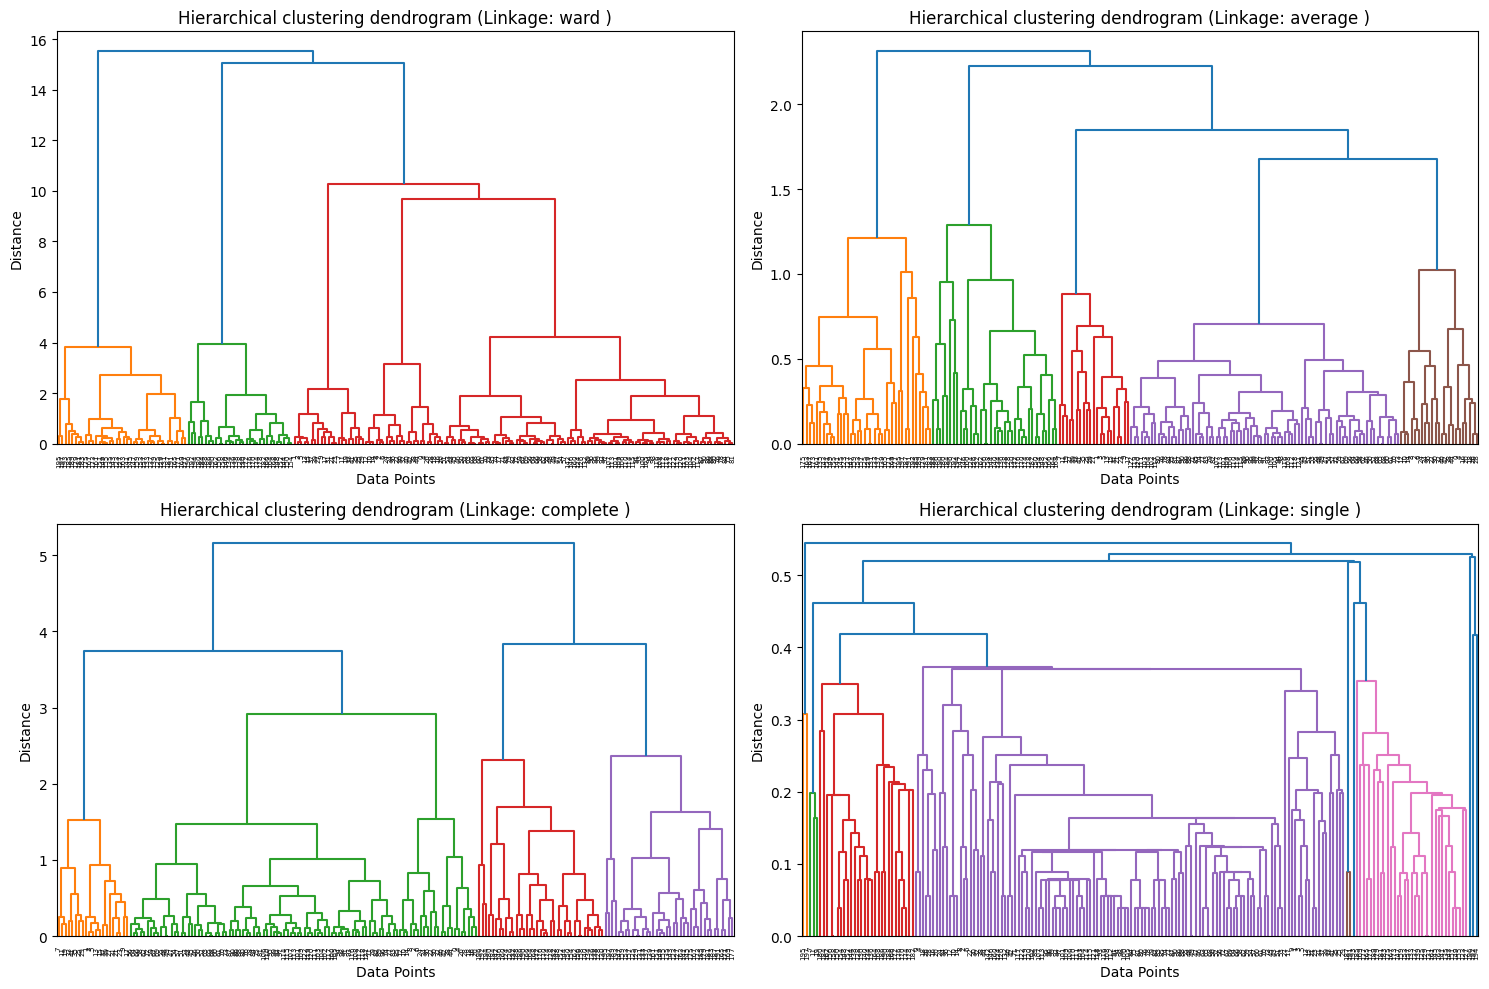

In [87]:
linkage_methods = ['ward', 'average', 'complete', 'single']

plt.figure(figsize=(15,10))

for i,method in enumerate(linkage_methods):
    linked = linkage(df_scaler, method=method)

    plt.subplot(2,2,i+1)
    dendrogram(linked, orientation='top')
    plt.title(f'Hierarchical clustering dendrogram (Linkage: {method} )')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')

plt.tight_layout()